In [7]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 
# NORMALIZATION : values between 0 to 1

In [9]:
(x_train, y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [7]:
print(x_train.shape) # 60000 sets, 28 X 28 pixels
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
x_train[0, :, :] # values between 0 and 255.0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
print(y_train[0:5])
print(y_test[0:5])

[5 0 4 1 9]
[7 2 1 0 4]


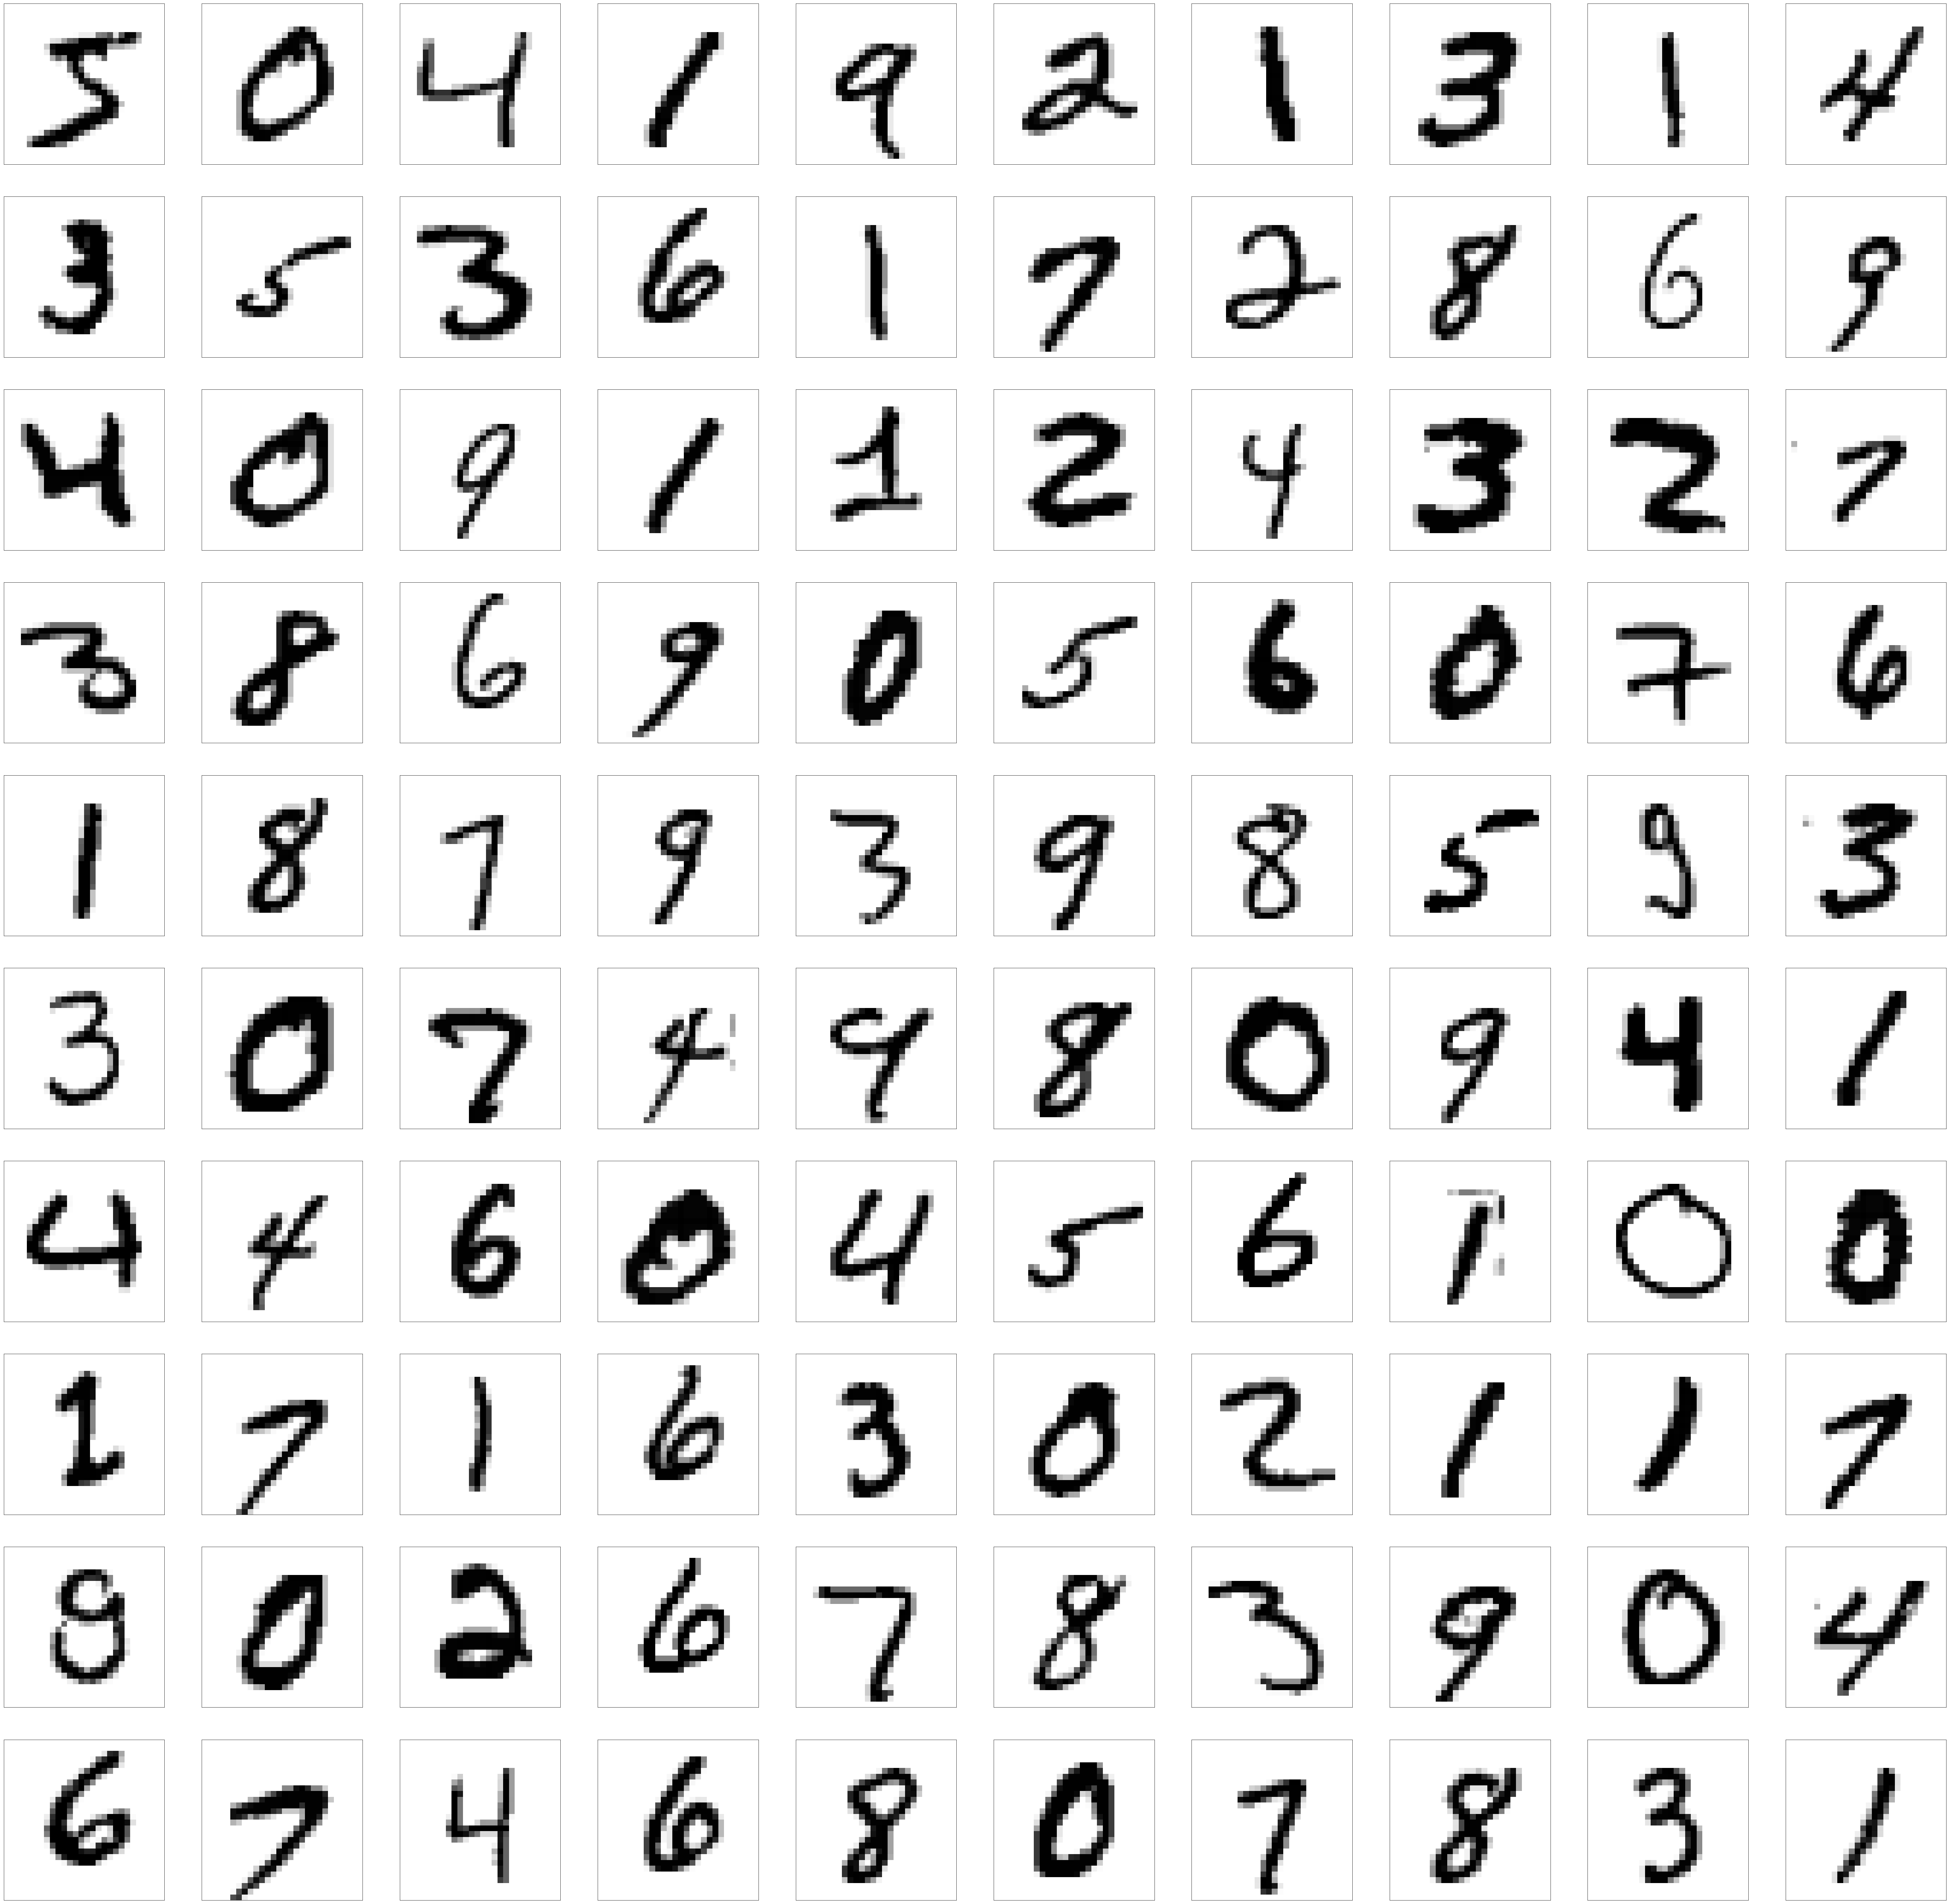

In [14]:
plt.figure(figsize=(100,100)) # size of figure
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary) # default : RGB, transform to black and white
plt.show()

In [17]:
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
img_rows = 28 # image input : matrix of 2 dimensions
img_cols = 28 

model = tf.keras.models.Sequential([
    # Flatten : to transform matirx to vecotrs ; Flatten(input_shape=(28, 28) => input_shape(784))
    tf.keras.layers.Flatten(input_shape=(img_rows, img_cols)), # input layer, node # : 28 X 28 = 784
    tf.keras.layers.Dense(512, activation='relu'), # hidden layer, node # : 512
    tf.keras.layers.Dropout(0.2), # a value between 0 to 1, edges between input and hidden layers, 가지치기, to enhance performance
    tf.keras.layers.Dense(10, activation='softmax') # output layer, node # : 10
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) # transform to one-hot coding 

In [22]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [23]:
history = model.fit(x_train, y_train, epochs=10, 
                    batch_size=32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 275us/sample - loss: 11.0647 - acc: 0.3126 - val_loss: 9.7134 - val_acc: 0.3966
Epoch 2/10
48000/48000 [==============================] - 11s 237us/sample - loss: 9.9817 - acc: 0.3803 - val_loss: 10.4445 - val_acc: 0.3514
Epoch 3/10
48000/48000 [==============================] - 10s 217us/sample - loss: 10.7332 - acc: 0.3339 - val_loss: 10.2606 - val_acc: 0.3632
Epoch 4/10
48000/48000 [==============================] - 12s 241us/sample - loss: 10.4085 - acc: 0.3541 - val_loss: 10.2954 - val_acc: 0.3612
Epoch 5/10
48000/48000 [==============================] - 11s 237us/sample - loss: 10.2582 - acc: 0.3635 - val_loss: 10.1651 - val_acc: 0.3692
Epoch 6/10
48000/48000 [==============================] - 11s 237us/sample - loss: 10.2776 - acc: 0.3622 - val_loss: 10.3651 - val_acc: 0.3566
Epoch 7/10
48000/48000 [==============================] - 11s 226us/sample - loss: 10.1980 - a

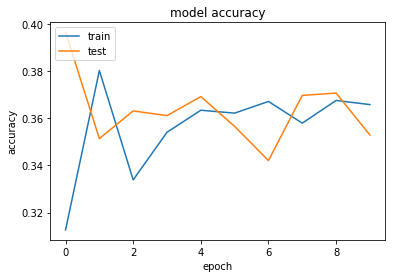

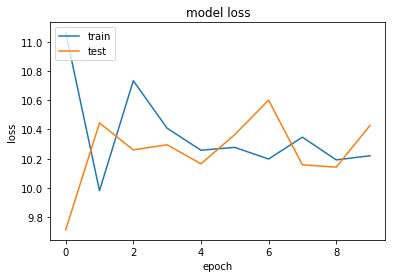

In [24]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 10.3398 - acc: 0.3585


[10.339774299621583, 0.3585]

In [26]:
model.evaluate(x_train, y_train)

60000/60000 [==============================] - 3s 53us/sample - loss: 10.4319 - acc: 0.3526


[10.431949368540446, 0.35265]

In [27]:
from IPython.display import HTML

In [28]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [30]:
HTML(input_form + javascript)

In [31]:
len(image)

784

<BarContainer object of 10 artists>

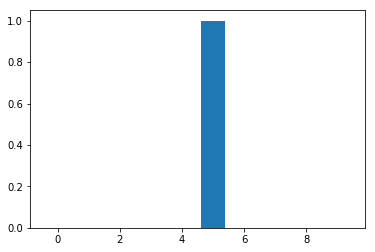

In [32]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols])
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))